In [1]:
# Objective:
# The objective of this assignment is to introduce to various clustering algorithms, 
# including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in 
# applying these techniques to a real-world dataset.

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset

df = pd.read_csv("EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.shape

(3999, 12)

In [7]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


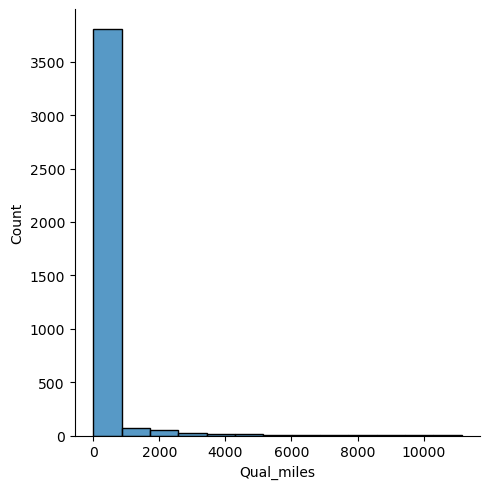

In [10]:
# Visualizations

sns.displot(df['Qual_miles'])

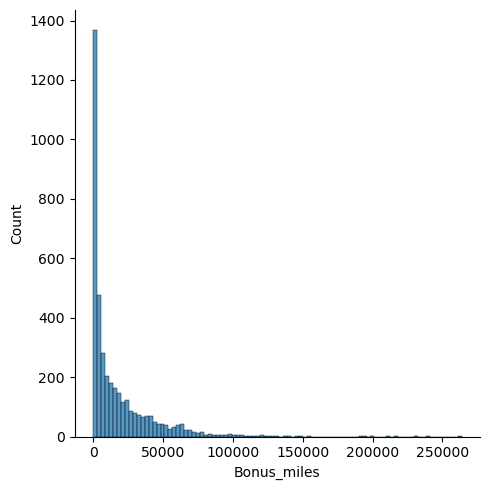

In [11]:
sns.displot(df['Bonus_miles'])

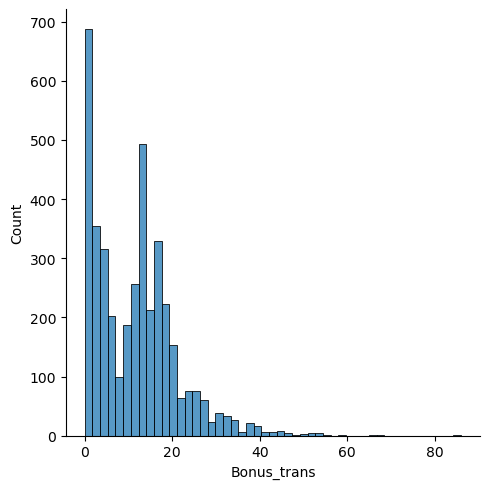

In [12]:
sns.displot(df['Bonus_trans'])

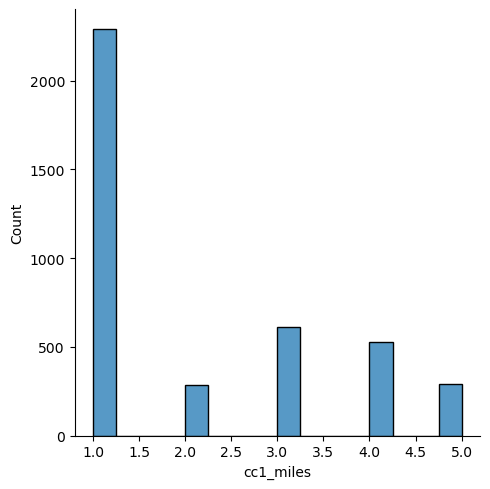

In [13]:
sns.displot(df['cc1_miles'])

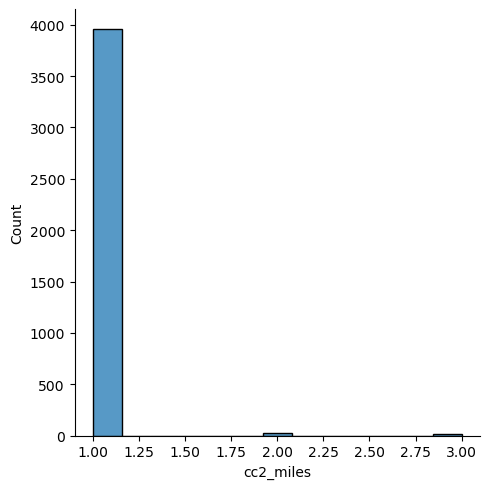

In [14]:
sns.displot(df['cc2_miles'])

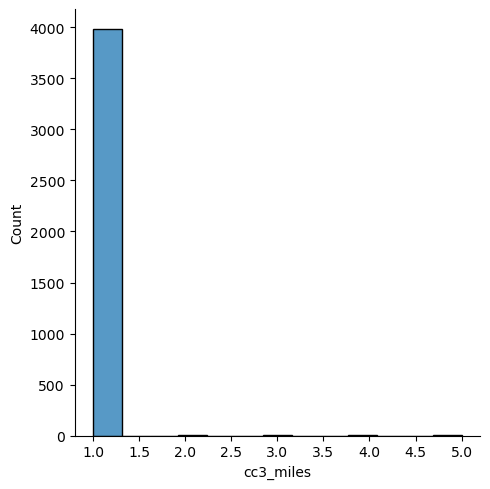

In [15]:
sns.displot(df['cc3_miles'])

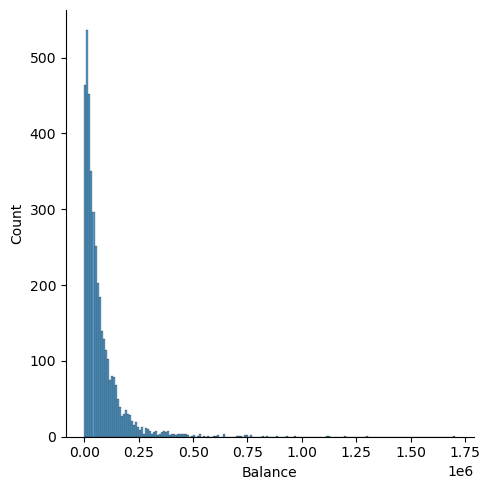

In [16]:
sns.displot(df['Balance'])

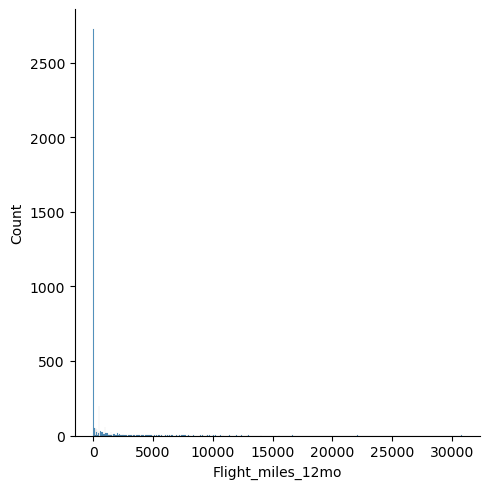

In [17]:
sns.displot(df['Flight_miles_12mo'])

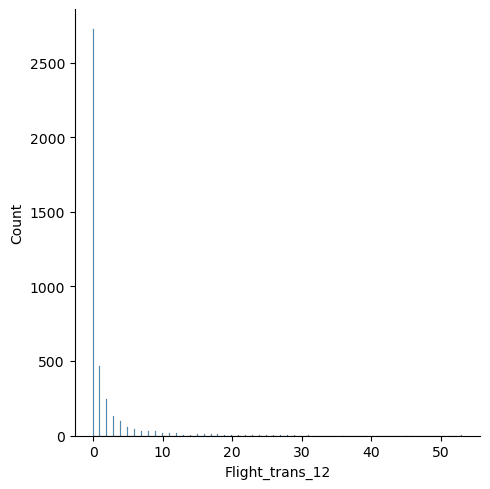

In [18]:
sns.displot(df['Flight_trans_12'])

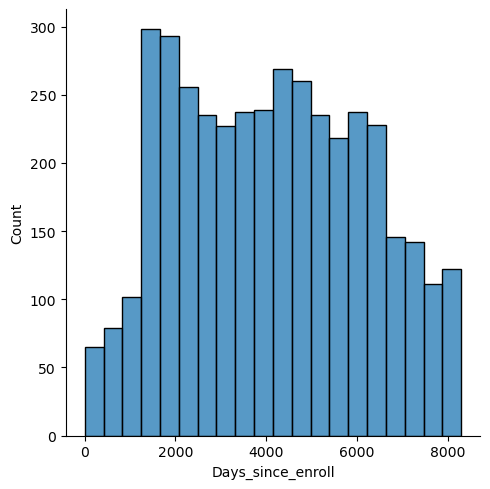

In [19]:
sns.displot(df['Days_since_enroll'])

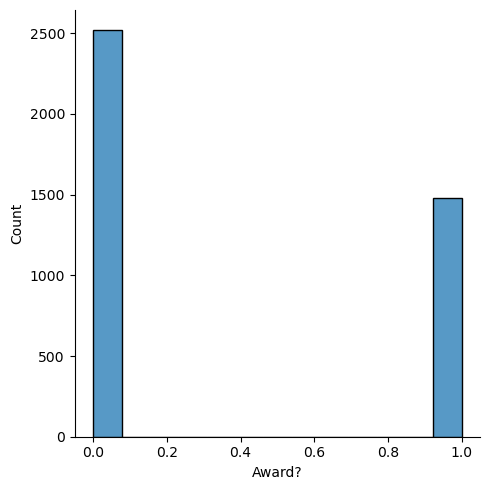

In [20]:
sns.displot(df['Award?'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\4142648810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


<Axes: xlabel='Balance', ylabel='Density'>

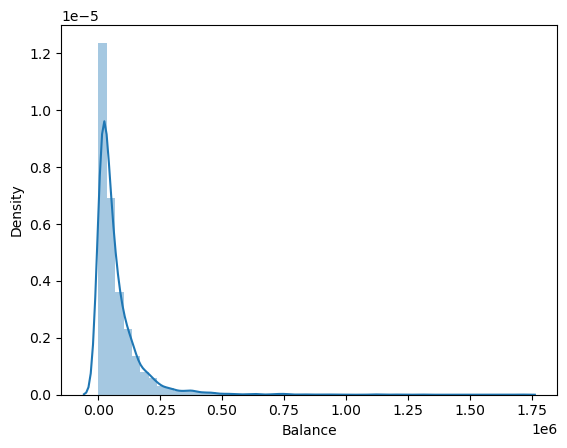

In [21]:
sns.distplot(df['Balance'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\2785183266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Qual_miles'])


<Axes: xlabel='Qual_miles', ylabel='Density'>

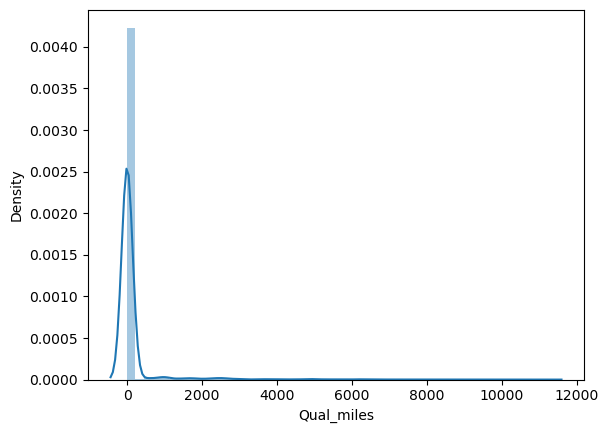

In [22]:
sns.distplot(df['Qual_miles'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\2384280335.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cc1_miles'])


<Axes: xlabel='cc1_miles', ylabel='Density'>

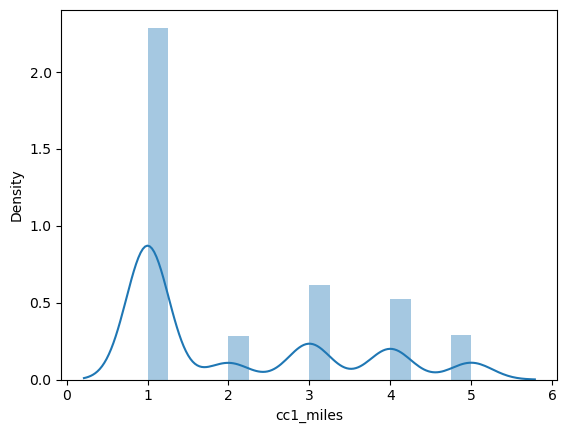

In [23]:
sns.distplot(df['cc1_miles'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\1759016063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cc2_miles'])


<Axes: xlabel='cc2_miles', ylabel='Density'>

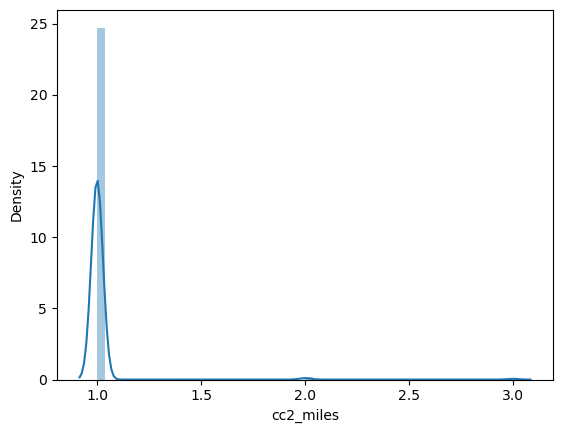

In [24]:
sns.distplot(df['cc2_miles'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\785748002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cc3_miles'])


<Axes: xlabel='cc3_miles', ylabel='Density'>

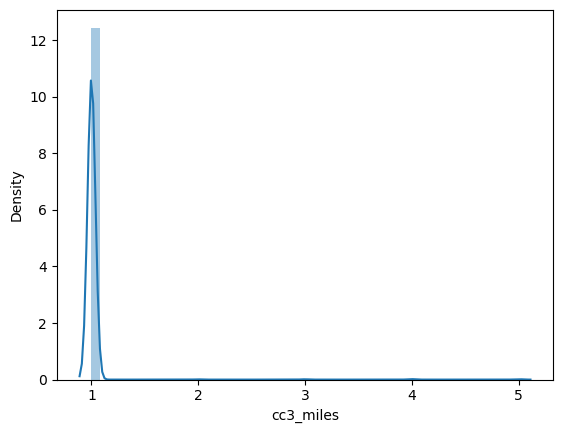

In [25]:
sns.distplot(df['cc3_miles'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\1308470759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bonus_miles'])


<Axes: xlabel='Bonus_miles', ylabel='Density'>

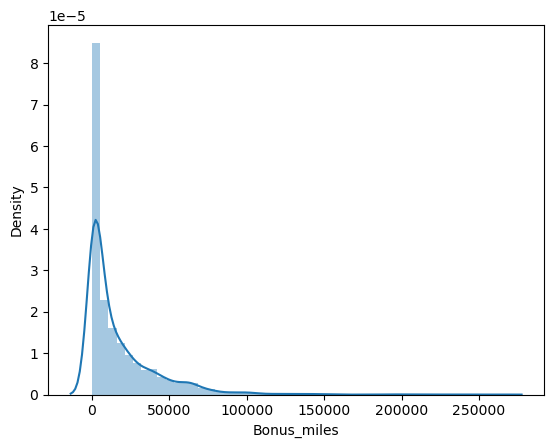

In [26]:
sns.distplot(df['Bonus_miles'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\2168950934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bonus_trans'])


<Axes: xlabel='Bonus_trans', ylabel='Density'>

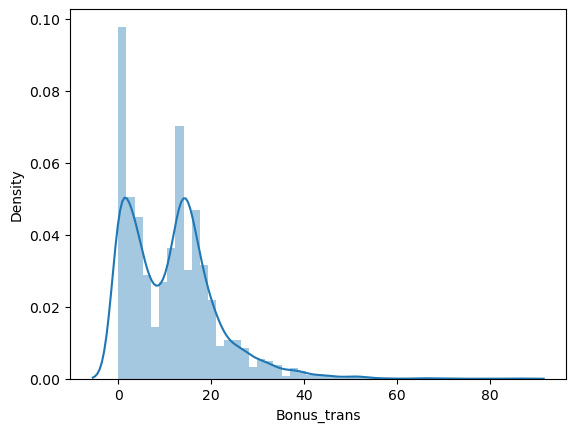

In [27]:
sns.distplot(df['Bonus_trans'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\3661627163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight_miles_12mo'])


<Axes: xlabel='Flight_miles_12mo', ylabel='Density'>

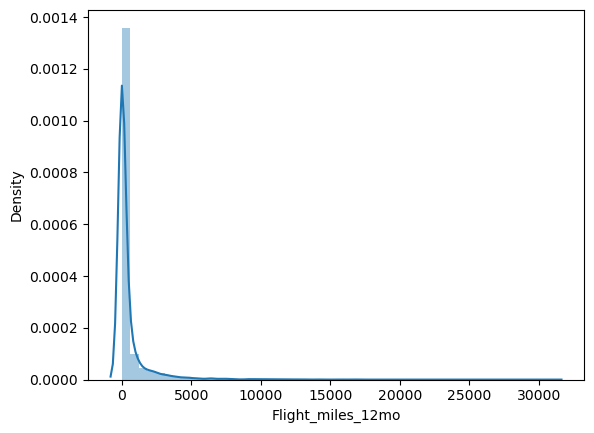

In [28]:
sns.distplot(df['Flight_miles_12mo'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\3423419438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Flight_trans_12'])


<Axes: xlabel='Flight_trans_12', ylabel='Density'>

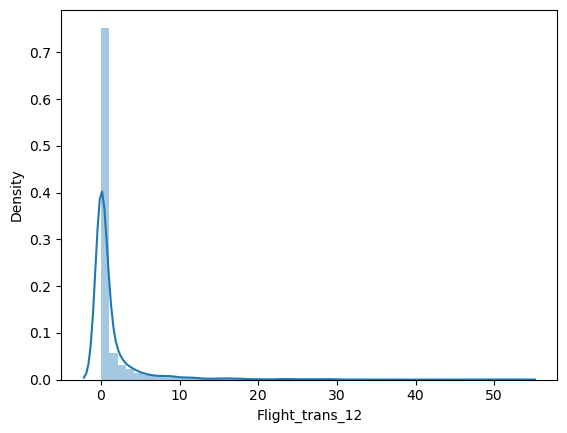

In [29]:
sns.distplot(df['Flight_trans_12'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\4137020428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Days_since_enroll'])


<Axes: xlabel='Days_since_enroll', ylabel='Density'>

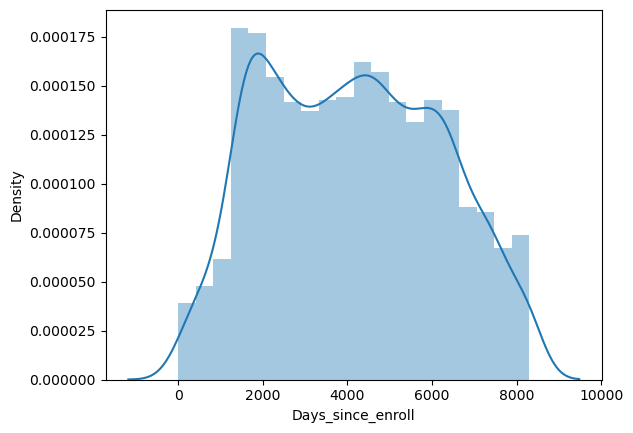

In [30]:
sns.distplot(df['Days_since_enroll'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_17376\831075215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Award?'])


<Axes: xlabel='Award?', ylabel='Density'>

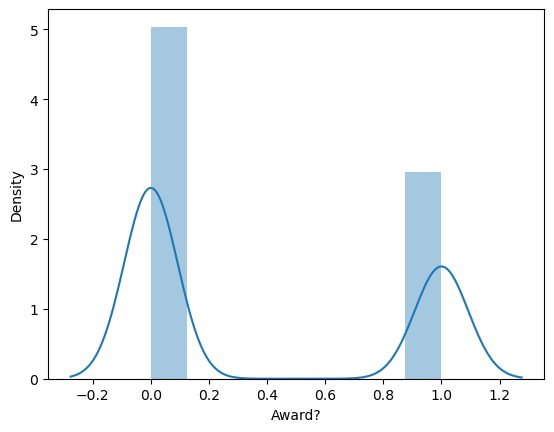

In [31]:
sns.distplot(df['Award?'])

In [32]:
# Handling missing values

df.isnull()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
print(df.isnull().sum())
print(df.isnull().sum().sum())
# There are no missing values in the dataset

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
0


In [34]:
# K means algorithm
# We will analyze Bonus_miles and Flight_miles_12mo

In [35]:
# Assign input variables

x = df.iloc[:,[6,8]].values
x

array([[  174,     0],
       [  215,     0],
       [ 4123,     0],
       ...,
       [25447,     0],
       [  500,   500],
       [    0,     0]], dtype=int64)

In [36]:
# Model fitting and Model evaluation EDA2
# WCSS cluster sum of squares
# init is a special method used in the process
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
# Inertia measures how well dataset was clustered by K means
# It calculates measuring the distance between each data points and its centroid
# Squaring this distance and summing these squares across one cluster to form the cluster
# A good model is one with a low inertia and lower no of clusters

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\clust

In [37]:
kmeans = KMeans(n_clusters = 6,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

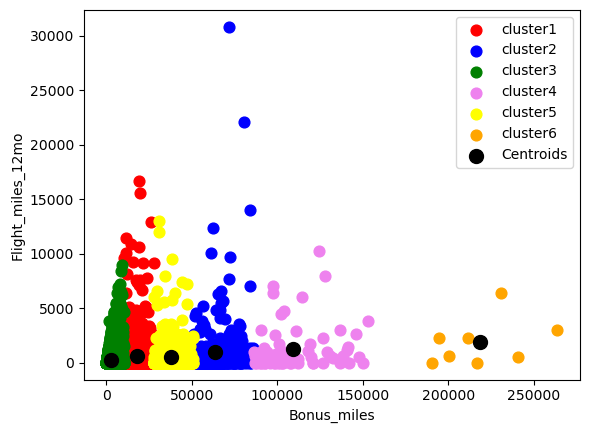

In [38]:
# clusters = 6

plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=60,c='red',label='cluster1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=60,c='blue',label='cluster2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=60,c='green',label='cluster3')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=60,c='violet',label='cluster4')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1],s=60,c='yellow',label='cluster5')
plt.scatter(x[y_kmeans == 5,0],x[y_kmeans == 5,1],s=60,c='orange',label='cluster6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Bonus_miles')
plt.ylabel('Flight_miles_12mo')
plt.legend()

In [39]:
# Elbow curve for different K values

In [40]:
# Model fitting and Model evaluation EDA2
# WCSS=WITHIN CLUSTER SUM OF SQUARES, Euclidean distance
# init is a special method  used in the process of initializing an object
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\clust

In [41]:
kmeans =KMeans(n_clusters=6,init="k-means++",random_state= 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 2, 2])

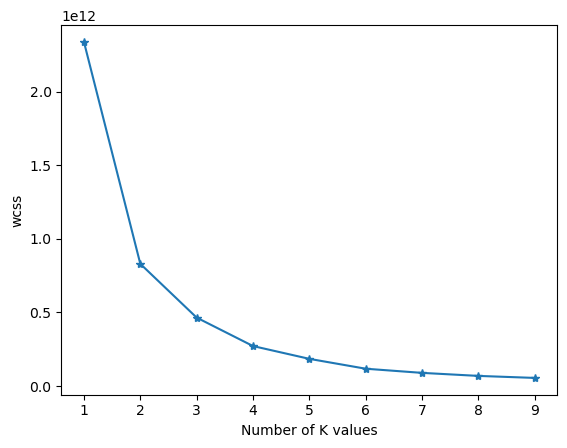

In [42]:
# Elbow method to optimize no of clusters
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9],wcss,marker = '*')
plt.xlabel('Number of K values')
plt.ylabel('wcss')
plt.show()

In [43]:
# Silhouette score

# The silhouette score runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating a poor match between the 
# data points and their corresponding cluster. The silhouette score threshold, which is used to 
# assess the quality of a cluster, is commonly set at 0.5

# Used to evaluate quality of clustering in kmeans as well as dbscan
# A score more than 0.5 indicates high quality cluster
# A score less than 0.5 indicates high quality cluster

from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)

0.6468905873961924

In [44]:
# Hierarchical clustering algorithm
# We will analyze Bonus_miles and Flight_miles_12mo

In [45]:
x = df.loc[:,["Bonus_miles","Flight_miles_12mo"]]
x

,Bonus_miles,Flight_miles_12mo
0,174,0
1,215,0
2,4123,0
3,500,0
4,43300,2077
...,...,...
3994,8525,200
3995,981,0
3996,25447,0
3997,500,500


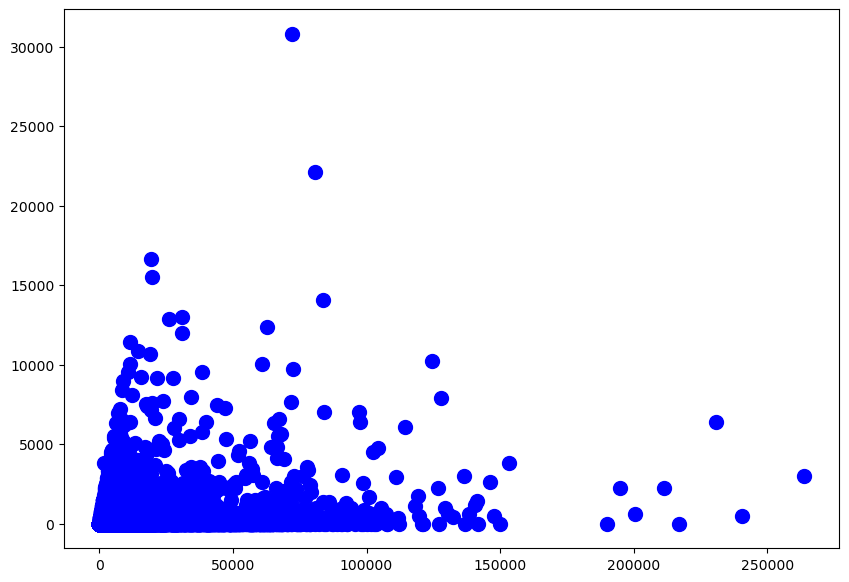

In [46]:
plt.figure(figsize=(10,7))
plt.scatter(x[["Bonus_miles"]], x[["Flight_miles_12mo"]], s=100, c='blue')

In [47]:
import scipy.cluster.hierarchy as sch

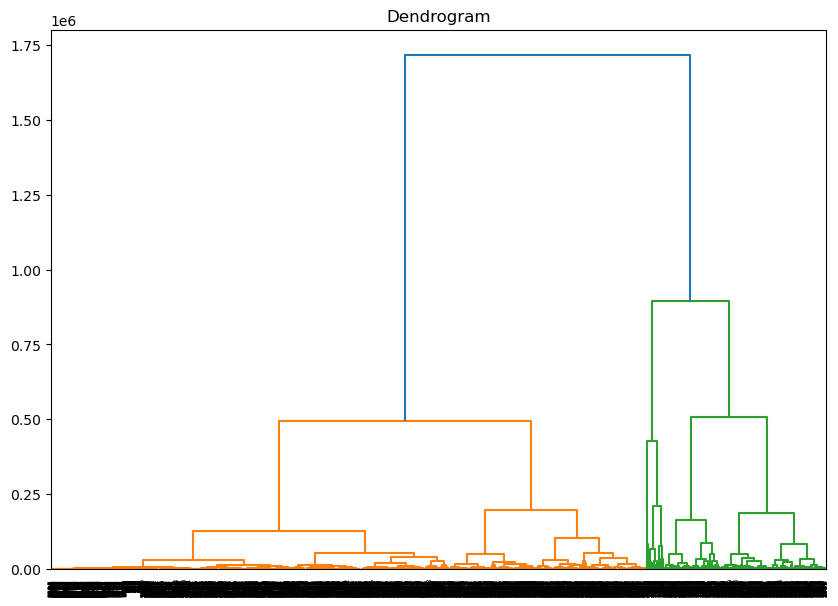

In [48]:
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title("Dendrogram")
plt.show()

In [49]:
# DBSCAN clustering algorithm
# We will analyze Bonus_miles and Flight_miles_12mo

In [50]:
# Find correlation between Bonus_miles and Flight_miles_12mo

x = df.loc[:,["Bonus_miles","Flight_miles_12mo"]]
x

,Bonus_miles,Flight_miles_12mo
0,174,0
1,215,0
2,4123,0
3,500,0
4,43300,2077
...,...,...
3994,8525,200
3995,981,0
3996,25447,0
3997,500,500


In [51]:
x.corr(numeric_only=True)

,Bonus_miles,Flight_miles_12mo
Bonus_miles,1.000000,0.183536
Flight_miles_12mo,0.183536,1.000000


<Axes: >

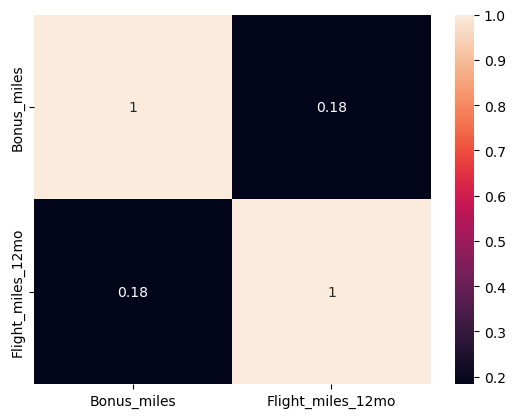

In [52]:
sns.heatmap(x.corr(numeric_only= True),annot= True)

In [53]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
db

DBSCAN(eps=3, min_samples=4)

In [54]:
model=db.fit(x)
model

DBSCAN(eps=3, min_samples=4)

In [55]:
label=model.labels_
label

array([-1, -1,  0, ..., -1, 26,  2], dtype=int64)

In [56]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 72


In [57]:
y_means = db.fit_predict(x)
y_means

array([-1, -1,  0, ..., -1, 26,  2], dtype=int64)

In [58]:
# Visualizing the results

from collections import Counter
outliers_df = pd.DataFrame(x)
print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({-1: 2943, 2: 477, 1: 48, 9: 38, 4: 21, 26: 19, 27: 19, 30: 17, 21: 16, 40: 16, 3: 14, 39: 14, 6: 13, 17: 13, 22: 13, 14: 11, 28: 11, 55: 11, 5: 9, 36: 9, 42: 9, 51: 9, 32: 8, 52: 8, 7: 7, 11: 7, 23: 7, 31: 7, 53: 7, 13: 6, 18: 6, 45: 6, 59: 6, 62: 6, 70: 6, 10: 5, 16: 5, 20: 5, 24: 5, 29: 5, 41: 5, 43: 5, 50: 5, 65: 5, 66: 5, 0: 4, 47: 4, 8: 4, 12: 4, 15: 4, 19: 4, 25: 4, 33: 4, 34: 4, 35: 4, 37: 4, 38: 4, 44: 4, 46: 4, 48: 4, 49: 4, 54: 4, 56: 4, 57: 4, 58: 4, 60: 4, 61: 4, 63: 4, 64: 4, 67: 4, 68: 4, 71: 4, 69: 4})
      Bonus_miles  Flight_miles_12mo
0             174                  0
1             215                  0
4           43300               2077
6           27482                  0
7            5250                250
...           ...                ...
3991        14981                  0
3992          929                  0
3993          365                  0
3994         8525                200
3996        25447                  0

[2943 rows x 2 columns]

In [59]:
from sklearn import metrics
print(metrics.silhouette_score(x,label))

# The silhouette score runs from -1 to 1, with 1 indicating a perfect fit and -1 indicating a poor match between the 
# data points and their corresponding cluster. The silhouette score threshold, which is used to 
# assess the quality of a cluster, is commonly set at 0.5

# Used to evaluate quality of clustering in kmeans as well as dbscan
# A score more than 0.5 indicates high quality cluster
# A score less than 0.5 indicates high quality cluster

-0.13214529876231262
